In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lightning_features = []
for i in range(2011, 2021):
  path = '/content/drive/My Drive/CMPE 255 Project/data/nooa_weather/nooa_lightning_data/nooany_{}.csv'.format(i)
  lightning_features_year = pd.read_csv(path)
  lightning_features.append(lightning_features_year)

lightning_features = pd.concat(lightning_features)
lightning_features['Date'] = pd.to_datetime(lightning_features['date'], format='%b %d, %Y')
lightning_features

,date,state,zip_code,city,count_lightning,Center Point Geometry,Date
0,"Jan 4, 2011",New York,14011,Attica village,1,0.000037,2011-01-04
1,"Jan 7, 2011",New York,11901,"Northville CDP, Aquebogue CDP, Northampton CDP...",1,0.000037,2011-01-07
2,"Jan 12, 2011",New York,11937,"East Hampton North CDP, Wainscott CDP, East Ha...",1,0.000037,2011-01-12
3,"Jan 16, 2011",New York,13367,Lowville village,1,0.000037,2011-01-16
4,"Jan 27, 2011",New York,10304,New York city,1,0.000037,2011-01-27
...,...,...,...,...,...,...,...
5264,"Jul 30, 2020",New York,10512,"Lake Carmel CDP, Carmel Hamlet CDP",7,0.000177,2020-07-30
5265,"Jul 30, 2020",New York,10506,Bedford CDP,7,0.000177,2020-07-30
5266,"Jul 30, 2020",New York,12791,Youngsville,9,0.000177,2020-07-30
5267,"Jul 30, 2020",New York,14779,Salamanca city,9,0.000177,2020-07-30


In [ ]:
lightning_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152455 entries, 0 to 5268
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   152455 non-null  object        
 1   state                  152455 non-null  object        
 2   zip_code               152455 non-null  int64         
 3   city                   152455 non-null  object        
 4   count_lightning        152455 non-null  int64         
 5   Center Point Geometry  152455 non-null  float64       
 6   Date                   152455 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 9.3+ MB


In [ ]:
pd.DataFrame(lightning_features.groupby('city')['date'].count()).reset_index().sort_values(by='date', ascending=False)

,city,date
385,Long Lake CDP,196
389,Lowville village,153
534,Piseco,127
605,Saranac Lake village,126
589,Rome city,125
...,...,...
475,Nicholville,11
108,Chase mills,11
746,Westmere CDP,11
717,"Water Mill CDP, Tuckahoe CDP, Noyack CDP, Sout...",10


In [ ]:
cities = lightning_features['city'].unique()
cities.sort()
print(cities)

['Accord CDP' 'Adams Center CDP' 'Addison village' 'Afton village'
 'Akron village' 'Albion village' 'Alden village, Town Line CDP'
 'Alexander village' 'Alexandria Bay village' 'Almond village' 'Alpine'
 'Altamont village' 'Altmar village' 'Altona CDP'
 'Ames village, Canajoharie village, Palatine Bridge village' 'Ancram'
 'Andes CDP' 'Andover village' 'Angelica village'
 'Angola on the Lake CDP, Angola village, Lake Erie Beach CDP'
 'Apalachin CDP' 'Appleton' 'Argyle village' 'Arkport village' 'Ashville'
 'Athens village' 'Athol' 'Attica village' 'Au Sable Forks CDP'
 'Austerlitz' 'Ava' 'Avoca village' 'Bainbridge village' 'Bangor'
 'Barker village' 'Barryville' 'Barton' 'Basom' 'Batavia city'
 'Bath village'
 'Beaver Dam Lake CDP, Vails Gate CDP, Firthcliffe CDP, New Windsor CDP'
 'Beaver dams' 'Bedford CDP' 'Belfast CDP'
 'Belmont village, Angelica village, Scio CDP' 'Bemus Point village'
 'Bergen village' 'Berkshire' 'Berlin' 'Berne'
 'Billington Heights CDP, East Aurora village' 

In [ ]:
city = 'New York city'
agg_nyc_lighting_count = pd.DataFrame(lightning_features[lightning_features.city == city].groupby('date')['count_lightning'].sum()).reset_index()
agg_nyc_lighting_count.columns = ['Date', 'NumLightning']
agg_nyc_lighting_count['Date'] = pd.to_datetime(agg_nyc_lighting_count['Date'], format='%b %d, %Y')
agg_nyc_lighting_count

,Date,NumLightning
0,2016-04-01,1
1,2013-04-10,5
2,2015-04-10,1
3,2013-04-11,3
4,2011-04-12,1
...,...,...
229,2012-09-07,9
230,2014-09-07,8
231,2011-09-08,3
232,2012-09-08,9


In [ ]:
agg_nyc_lighting_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          234 non-null    datetime64[ns]
 1   NumLightning  234 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


In [ ]:
path = '/content/drive/My Drive/CMPE 255 Project/data/nooa_weather/nooa_lightning_data/agg_2011_2020_num_lightning_features.csv'
agg_nyc_lighting_count.to_csv(path, index=False)

<Figure size 432x288 with 0 Axes>

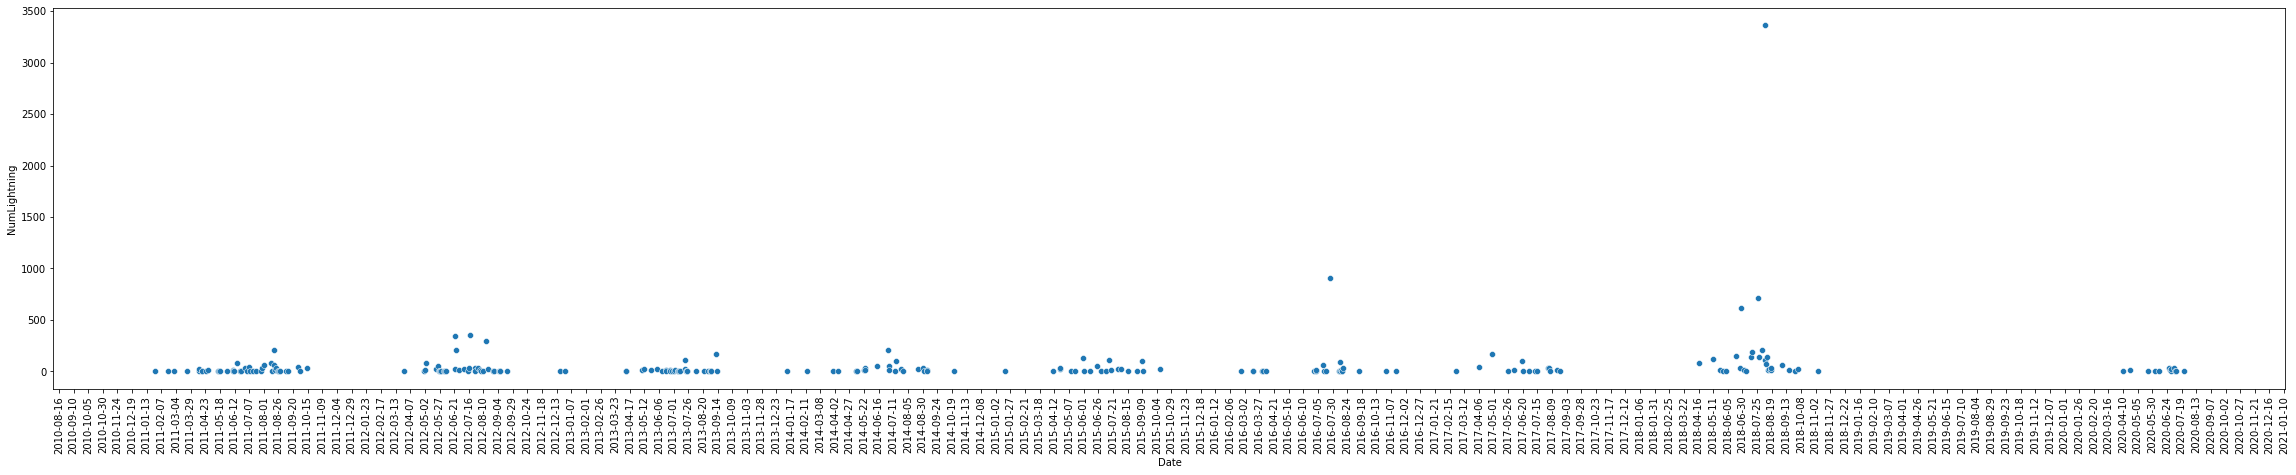

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(40, 7))
sns.scatterplot(x="Date", y="NumLightning", data=agg_nyc_lighting_count.sort_values('Date'))
ax.xaxis.set_major_locator(plt.MaxNLocator(156))
plt.xticks(rotation=90)
plt.show()